In [1]:
# import the required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV

from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score

## 1. Build Clustering Models using Numerical Data

### 1.1 Data exploration and manipulation

In [2]:
df=pd.read_csv('Bank_Data.csv')

In [3]:
df.head()

,Account Status,Duration in month,Credit History,Purpose,Credit amount,Savings account or bonds,Present employment since,Instalment rate in percentage of disposable income,Personal status and sex,Other debtors or guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Target
0,Salary assignments for at least 1 year,6,critical account/ other credits existing (not ...,radio/television,1169,Savings account,> 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,Salary assignments for at least 2 year,48,existing credits paid back duly till now,radio/television,5951,Savings account,1 - 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,None,yes,2
2,No Checking account,12,critical account/ other credits existing (not ...,education,2096,Savings account,4- 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,None,yes,1
3,Salary assignments for at least 1 year,42,existing credits paid back duly till now,furniture/equipment,7882,Savings account,4- 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,None,yes,1
4,Salary assignments for at least 1 year,24,delay in paying off in the past,car(new),4870,Savings account,1 - 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,None,yes,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Account Status                                            1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit History                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account or bonds                                  1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Instalment rate in percentage of disposable income        1000 non-null   int64 
 8   Personal status and sex      

In [5]:
df.describe()

,Duration in month,Credit amount,Instalment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
df.isnull().sum()

Account Status                                              0
Duration in month                                           0
Credit History                                              0
Purpose                                                     0
Credit amount                                               0
Savings account or bonds                                    0
Present employment since                                    0
Instalment rate in percentage of disposable income          0
Personal status and sex                                     0
Other debtors or guarantors                                 0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

### Categorical data

In [7]:
df_cat = df.select_dtypes(['object']).copy()
df_cat.head()

,Account Status,Credit History,Purpose,Savings account or bonds,Present employment since,Personal status and sex,Other debtors or guarantors,Property,Other installment plans,Housing,Job,Telephone,Foreign worker
0,Salary assignments for at least 1 year,critical account/ other credits existing (not ...,radio/television,Savings account,> 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,Salary assignments for at least 2 year,existing credits paid back duly till now,radio/television,Savings account,1 - 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,None,yes
2,No Checking account,critical account/ other credits existing (not ...,education,Savings account,4- 7 years,male : single,none,real estate,none,own,unskilled - resident,None,yes
3,Salary assignments for at least 1 year,existing credits paid back duly till now,furniture/equipment,Savings account,4- 7 years,male : single,guarantor,building society savings agreement/ life insur...,none,for free,skilled employee / official,None,yes
4,Salary assignments for at least 1 year,delay in paying off in the past,car(new),Savings account,1 - 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,None,yes


In [8]:
df_cat.describe()

,Account Status,Credit History,Purpose,Savings account or bonds,Present employment since,Personal status and sex,Other debtors or guarantors,Property,Other installment plans,Housing,Job,Telephone,Foreign worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,1,5,4,3,4,3,3,4,2,2
top,No Checking account,existing credits paid back duly till now,radio/television,Savings account,1 - 4 years,male : single,none,"car or other, not in attribute 6",none,own,skilled employee / official,None,yes
freq,394,530,280,1000,339,548,907,332,814,713,630,596,963


In [9]:
for col in df_cat:
    print (col+ " :")
    print(df_cat[col].unique())

Account Status :
['Salary assignments for at least 1 year'
 'Salary assignments for at least 2 year' 'No Checking account'
 'Salary assignments for at least 3 year']
Credit History :
['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']
Purpose :
['radio/television' 'education' 'furniture/equipment' 'car(new)'
 'car(used)' 'business' 'domestic appliances' 'repairs' 'others'
 'retraining']
Savings account or bonds :
['Savings account']
Present employment since :
['> 7 years' '1 - 4 years' '4- 7 years' 'unemployed' ' < 1 year']
Personal status and sex :
['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male : married/widowed']
Other debtors or guarantors :
['none' 'guarantor' 'co-applicant']
Property :
['real estate' 'building society savings agreement/ life insurance'
 'unkno

In [10]:
# account status
df['Account Status'] = df['Account Status'].map({'Salary assignments for at least 1 year':0,
                                                  'Salary assignments for at least 2 year':1,
                                                  'Salary assignments for at least 3 year':2,
                                                  'No Checking account': 3}).astype(int)
#credit history
df['Credit History'] = df['Credit History'].map( {'critical account/ other credits existing (not at this bank)':0, 
                                                  'existing credits paid back duly till now':1, 
                                                  'delay in paying off in the past':2,
                                                  'no credits taken/ all credits paid back duly': 3,
                                                  'all credits at this bank paid back duly':4}).astype(int)
#Purpose 
df['Purpose'] = df['Purpose'].map( {'radio/television':0, 'education':1, 'furniture/equipment':2, 'car(new)':3,
       'car(used)':4, 'business':5, 'domestic appliances':6, 'repairs':7, 'retraining':8, 'others':9} ).astype(int)

#Savings account or bonds drop coz only 1 value cannot see correlation
#df['Savings account or bonds'] = df['Savings account or bonds'].map( {'Savings account':0} ).astype(int)


#Present employment since 
df['Present employment since'] = df['Present employment since'].map({'> 7 years':0,
                                                                      '4- 7 years':1,
                                                                      '1 - 4 years':2,
                                                                      ' < 1 year':3,
                                                                      'unemployed':4}).astype(int) 

#Personal status and sex 
df['Personal status and sex'] = df['Personal status and sex'].map( {'male : single':0, 'female : divorced/separated/married':1,
                                                                      'male : divorced/separated':2,
                                                                      'male : married/widowed':3}).astype(int)  
#Other debtors or guarantors
df['Other debtors or guarantors'] = df['Other debtors or guarantors'].map( {'none':0, 'guarantor':1, 
                                   'co-applicant':2}).astype(int)
#Property
df['Property'] = df['Property'].map( {'real estate':0, 'building society savings agreement/ life insurance':1, 
                                   'unknown / no property':2, 
                                   'car or other, not in attribute 6': 3}).astype(int)

#Other installment plans
df['Other installment plans'] = df['Other installment plans'].map( {'none':0, 'bank':1, 
                                   'stores':2}).astype(int)

#Housing
df['Housing'] = df['Housing'].map( {'own':0, 'for free':1, 
                                   'rent':2}).astype(int)
# job
df['Job'] = df['Job'].map( {'skilled employee / official':0, 'unskilled - resident':1, 
                                   'management/ self-employed/\nhighly qualified employee/ officer':2, 
                                   'unemployed/ unskilled - non-resident': 3}).astype(int)
# Telephone 
df['Telephone'] = df['Telephone'].map( {'yes, registered under the customers name':0, 'None':1}).astype(int)

# Foreign worker 
df['Foreign worker'] = df['Foreign worker'].map( {'yes':0, 'no':1}).astype(int)

df.head()

,Account Status,Duration in month,Credit History,Purpose,Credit amount,Savings account or bonds,Present employment since,Instalment rate in percentage of disposable income,Personal status and sex,Other debtors or guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Target
0,0,6,0,0,1169,Savings account,0,4,0,0,...,0,67,0,0,2,0,1,0,0,1
1,1,48,1,0,5951,Savings account,2,2,1,0,...,0,22,0,0,1,0,1,1,0,2
2,3,12,0,1,2096,Savings account,1,2,0,0,...,0,49,0,0,1,1,2,1,0,1
3,0,42,1,2,7882,Savings account,1,2,0,1,...,1,45,0,1,1,0,2,1,0,1
4,0,24,2,3,4870,Savings account,2,3,0,0,...,2,53,0,1,2,0,2,1,0,2


### Numerical data

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Account Status                                            1000 non-null   int32 
 1   Duration in month                                         1000 non-null   int64 
 2   Credit History                                            1000 non-null   int32 
 3   Purpose                                                   1000 non-null   int32 
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account or bonds                                  1000 non-null   object
 6   Present employment since                                  1000 non-null   int32 
 7   Instalment rate in percentage of disposable income        1000 non-null   int64 
 8   Personal status and sex      

In [12]:
df_num = df.select_dtypes(['int64', 'float64']).copy() # to get data only with float64 and int64 datatype
df_num.head()

,Duration in month,Credit amount,Instalment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Target
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


In [13]:
df_num_new = df.select_dtypes(['int64', 'float64','int32']).copy() # to get all data
df_num_new.head()

,Account Status,Duration in month,Credit History,Purpose,Credit amount,Present employment since,Instalment rate in percentage of disposable income,Personal status and sex,Other debtors or guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Target
0,0,6,0,0,1169,0,4,0,0,4,0,67,0,0,2,0,1,0,0,1
1,1,48,1,0,5951,2,2,1,0,2,0,22,0,0,1,0,1,1,0,2
2,3,12,0,1,2096,1,2,0,0,3,0,49,0,0,1,1,2,1,0,1
3,0,42,1,2,7882,1,2,0,1,4,1,45,0,1,1,0,2,1,0,1
4,0,24,2,3,4870,2,3,0,0,4,2,53,0,1,2,0,2,1,0,2


In [14]:
# add in possible categorical datset
df_num = df_num.join(df["Job"])
df_num = df_num.join(df["Purpose"])
df_num = df_num.join(df["Credit History"])

Text(0.5, 0.98, 'Numerical Variables')

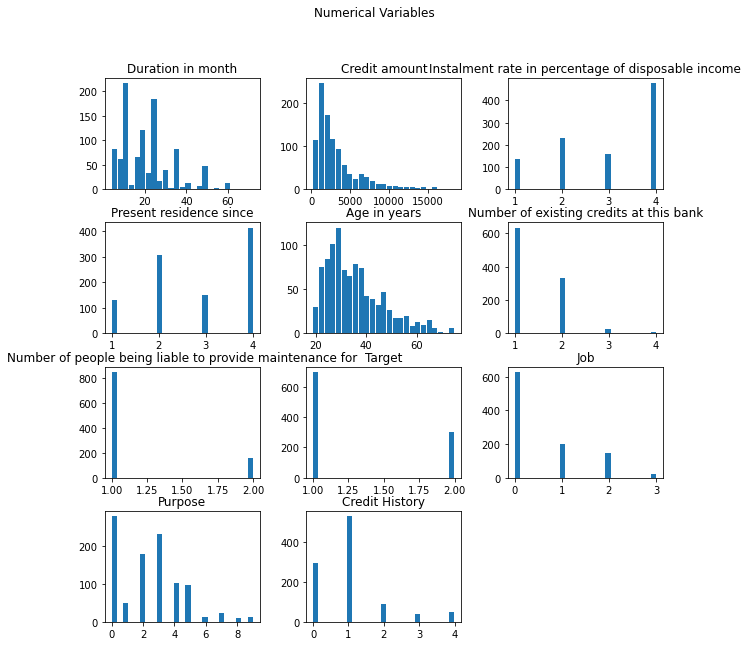

In [15]:
ax = df_num.hist(bins=25, grid=False, figsize=(10,10),zorder=2, rwidth=0.9)# plot the histogram for all numeric variables
plt.suptitle("Numerical Variables")

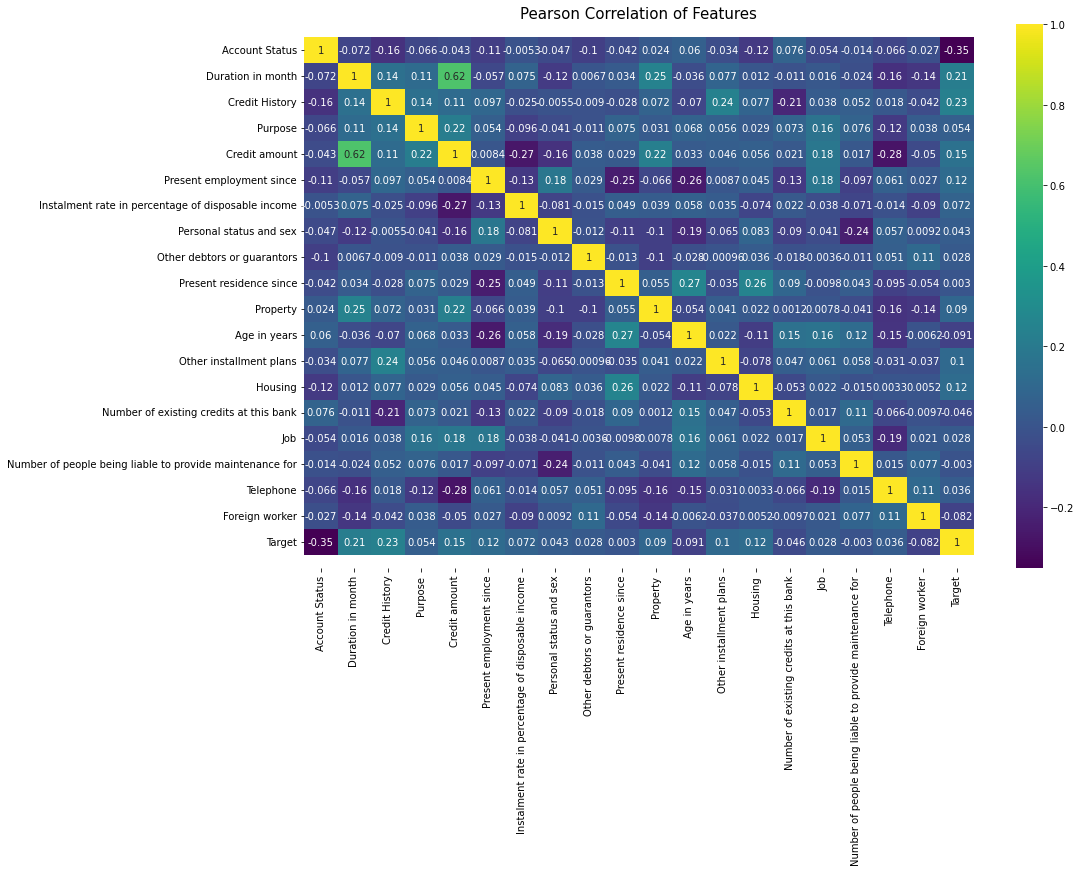

In [16]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_num_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 1.2 K-Means Clustering

First pair

In [17]:
# Select Two colulmns: duration in Month and credit amount
dfK = df_num.iloc[:,[0,1]]
dfK.describe()

,Duration in month,Credit amount
count,1000.000000,1000.000000
mean,20.903000,3271.258000
std,12.058814,2822.736876
min,4.000000,250.000000
25%,12.000000,1365.500000
50%,18.000000,2319.500000
75%,24.000000,3972.250000
max,72.000000,18424.000000


In [18]:
X =dfK.values

In [19]:
# Scaling the data so that all the features/attributes become comparable 
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [20]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=3, n_init=20, random_state=1)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


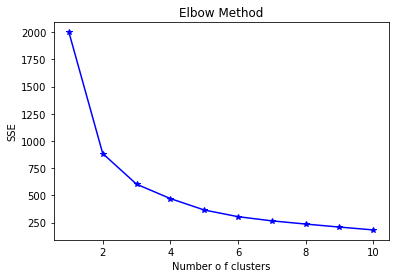

In [21]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(XKmeans_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number o f clusters')
plt.ylabel('SSE')
plt.show()

In [22]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5798632928012021
For n_clusters=3, the silhouette score is 0.4477684286561745
For n_clusters=4, the silhouette score is 0.4294842647939699
For n_clusters=5, the silhouette score is 0.4550067144658257
For n_clusters=6, the silhouette score is 0.44357127270194147
For n_clusters=7, the silhouette score is 0.44044844477737105
For n_clusters=8, the silhouette score is 0.4241715594513194


Highest silhouette score is 0.579 for 2 clusters

Second pair: start to choose based on age and other pair, as age is an obvious customer data

In [23]:
# Select Two colulmns: credit amount and age in years
dfK = df_num.iloc[:,[1,4]]
dfK.describe()

,Credit amount,Age in years
count,1000.000000,1000.000000
mean,3271.258000,35.546000
std,2822.736876,11.375469
min,250.000000,19.000000
25%,1365.500000,27.000000
50%,2319.500000,33.000000
75%,3972.250000,42.000000
max,18424.000000,75.000000


In [24]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [25]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=3, n_init=20, random_state=1)

In [26]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47542616900687223
For n_clusters=3, the silhouette score is 0.49028899057027964
For n_clusters=4, the silhouette score is 0.3850131109111199
For n_clusters=5, the silhouette score is 0.3990151036492397
For n_clusters=6, the silhouette score is 0.40684192431800226
For n_clusters=7, the silhouette score is 0.3779572522247257
For n_clusters=8, the silhouette score is 0.385671874003163


The highest silhouette score is 0.49 for 3 clusters

In [27]:
# Select Two colulmns:  age in years, Instalment rate in percentage of disposable income
dfK = df_num.iloc[:,[4,2]]
dfK.describe()

,Age in years,Instalment rate in percentage of disposable income
count,1000.000000,1000.000000
mean,35.546000,2.973000
std,11.375469,1.118715
min,19.000000,1.000000
25%,27.000000,2.000000
50%,33.000000,3.000000
75%,42.000000,4.000000
max,75.000000,4.000000


In [28]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [29]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=3, n_init=20, random_state=1)

In [30]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4510138036439349
For n_clusters=3, the silhouette score is 0.49580260108819413
For n_clusters=4, the silhouette score is 0.49564400114246054
For n_clusters=5, the silhouette score is 0.45051483618432087
For n_clusters=6, the silhouette score is 0.44009750182689017
For n_clusters=7, the silhouette score is 0.4639826859468333
For n_clusters=8, the silhouette score is 0.4978515084260395
For n_clusters=9, the silhouette score is 0.512968031825851
For n_clusters=10, the silhouette score is 0.5293496074327201
For n_clusters=11, the silhouette score is 0.5331110070664753


The highest silhouette score is 0.5288 for 10 clusters

In [31]:
# Select Two colulmns:  age in years, Present residence since

dfK = df_num.iloc[:,[4,3]]
dfK.describe()

,Age in years,Present residence since
count,1000.000000,1000.000000
mean,35.546000,2.845000
std,11.375469,1.103718
min,19.000000,1.000000
25%,27.000000,2.000000
50%,33.000000,3.000000
75%,42.000000,4.000000
max,75.000000,4.000000


In [32]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [33]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=3, n_init=20, random_state=1)

In [34]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44506912671278687
For n_clusters=3, the silhouette score is 0.49340978338133795
For n_clusters=4, the silhouette score is 0.4700042955077778
For n_clusters=5, the silhouette score is 0.4698210001153013
For n_clusters=6, the silhouette score is 0.4794925584997079
For n_clusters=7, the silhouette score is 0.5293249497549977
For n_clusters=8, the silhouette score is 0.5384642687991307
For n_clusters=9, the silhouette score is 0.5316408229963049
For n_clusters=10, the silhouette score is 0.5455589565245629
For n_clusters=11, the silhouette score is 0.5584020748105116


The highest silhouette score is 0.546 for 10 clusters

In [35]:
# Select Two colulmns:  age in years, Number of existing credits at this bank

dfK = df_num.iloc[:,[4,5]]
dfK.describe()

,Age in years,Number of existing credits at this bank
count,1000.000000,1000.000000
mean,35.546000,1.407000
std,11.375469,0.577654
min,19.000000,1.000000
25%,27.000000,1.000000
50%,33.000000,1.000000
75%,42.000000,2.000000
max,75.000000,4.000000


In [36]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [37]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=3, n_init=20, random_state=1)

In [38]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5146919160784551
For n_clusters=3, the silhouette score is 0.565764455430633
For n_clusters=4, the silhouette score is 0.5803996729646731
For n_clusters=5, the silhouette score is 0.5581422185547894
For n_clusters=6, the silhouette score is 0.5802945274817741
For n_clusters=7, the silhouette score is 0.575339011580026
For n_clusters=8, the silhouette score is 0.5718333896942677
For n_clusters=9, the silhouette score is 0.5671288624009605
For n_clusters=10, the silhouette score is 0.5674567753498836
For n_clusters=11, the silhouette score is 0.5593393277401353


The highest silhouette score is 0.581 for 4 clusters

In [39]:
# Select Two colulmns:  age in years,Job

dfK = df_num.iloc[:,[4,8]]
dfK.describe()

,Age in years,Job
count,1000.000000,1000.000000
mean,35.546000,0.562000
std,11.375469,0.821481
min,19.000000,0.000000
25%,27.000000,0.000000
50%,33.000000,0.000000
75%,42.000000,1.000000
max,75.000000,3.000000


In [40]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [41]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4695897135285688
For n_clusters=3, the silhouette score is 0.5127962366581962
For n_clusters=4, the silhouette score is 0.5210539816655906
For n_clusters=5, the silhouette score is 0.5368375188918936
For n_clusters=6, the silhouette score is 0.5159054527259529
For n_clusters=7, the silhouette score is 0.555010930586237
For n_clusters=8, the silhouette score is 0.5600833963985061
For n_clusters=9, the silhouette score is 0.5577146912013629
For n_clusters=10, the silhouette score is 0.5647475103738566
For n_clusters=11, the silhouette score is 0.5770892886555942


the highest silhouette score is 0.5648 at 11 clusters, it might be too big to handle

In [42]:
# Select Two colulmns:  age in years, Number of people being liable to provide maintenance for

dfK = df_num.iloc[:,[4,6]]
dfK.describe()

,Age in years,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000
mean,35.546000,1.155000
std,11.375469,0.362086
min,19.000000,1.000000
25%,27.000000,1.000000
50%,33.000000,1.000000
75%,42.000000,1.000000
max,75.000000,2.000000


In [43]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [44]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=3, n_init=20, random_state=1)

In [45]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6549447910068031
For n_clusters=3, the silhouette score is 0.6751134842415862
For n_clusters=4, the silhouette score is 0.6154159148181271
For n_clusters=5, the silhouette score is 0.610446976772494
For n_clusters=6, the silhouette score is 0.5782693734328079
For n_clusters=7, the silhouette score is 0.5518660626612756
For n_clusters=8, the silhouette score is 0.5507737387370746
For n_clusters=9, the silhouette score is 0.553134397555207
For n_clusters=10, the silhouette score is 0.5556453820246184
For n_clusters=11, the silhouette score is 0.545729556279273


The highest silhouette score is 0.6751 for 3 clusters, the highest silhouette for variables with age.

## try other variables other than age

In [46]:
# Select Two colulmns:  amount, number of existing credits at this bank

dfK = df_num.iloc[:,[1,5]]
dfK.describe()

,Credit amount,Number of existing credits at this bank
count,1000.000000,1000.000000
mean,3271.258000,1.407000
std,2822.736876,0.577654
min,250.000000,1.000000
25%,1365.500000,1.000000
50%,2319.500000,1.000000
75%,3972.250000,2.000000
max,18424.000000,4.000000


In [47]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [48]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=2, n_init=20, random_state=1)

In [49]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5572334938355463
For n_clusters=3, the silhouette score is 0.6339070146006031
For n_clusters=4, the silhouette score is 0.6529432499981169
For n_clusters=5, the silhouette score is 0.6737541553222435
For n_clusters=6, the silhouette score is 0.6616034106724997
For n_clusters=7, the silhouette score is 0.6201588842612137
For n_clusters=8, the silhouette score is 0.612173295826288
For n_clusters=9, the silhouette score is 0.6068369947923488
For n_clusters=10, the silhouette score is 0.5949029048066866
For n_clusters=11, the silhouette score is 0.5976188774458285


The highest silhouette score is 0.6737 for 5 clusters,it is much better than age + maintanace combination.

In [50]:
# Select Two colulmns:  Credit amount, Number of people being liable to provide maintenance for

dfK = df_num.iloc[:,[1,6]]
dfK.describe()

,Credit amount,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000
mean,3271.258000,1.155000
std,2822.736876,0.362086
min,250.000000,1.000000
25%,1365.500000,1.000000
50%,2319.500000,1.000000
75%,3972.250000,1.000000
max,18424.000000,2.000000


In [51]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [52]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=2, n_init=20, random_state=1)

In [53]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6890905477681898
For n_clusters=3, the silhouette score is 0.7180712602031553
For n_clusters=4, the silhouette score is 0.6603933877015801
For n_clusters=5, the silhouette score is 0.6616286421848704
For n_clusters=6, the silhouette score is 0.6242972077241591
For n_clusters=7, the silhouette score is 0.5931977159133917
For n_clusters=8, the silhouette score is 0.5844696031137974
For n_clusters=9, the silhouette score is 0.5819921358006355
For n_clusters=10, the silhouette score is 0.5847965971113206
For n_clusters=11, the silhouette score is 0.5885829075003104


The highest silhouette score is 0.718 for 3 clusters, and the average seems to be all higher than age and maintanance conbination. This i will be developing the 3 variable based on this 2 variables.

# 3 variables

In [54]:
# Select three colulmns:  amount, number of existing credits at this bank, age in years

dfK = df_num.iloc[:,[1,5,4]]
dfK.describe()

,Credit amount,Number of existing credits at this bank,Age in years
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.407000,35.546000
std,2822.736876,0.577654,11.375469
min,250.000000,1.000000,19.000000
25%,1365.500000,1.000000,27.000000
50%,2319.500000,1.000000,33.000000
75%,3972.250000,2.000000,42.000000
max,18424.000000,4.000000,75.000000


In [55]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [56]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=2, n_init=20, random_state=1)

In [57]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.36855815911758644
For n_clusters=3, the silhouette score is 0.4065653135052954
For n_clusters=4, the silhouette score is 0.43071377640866126
For n_clusters=5, the silhouette score is 0.4274003311785715
For n_clusters=6, the silhouette score is 0.44053474603310394
For n_clusters=7, the silhouette score is 0.3806703138597309
For n_clusters=8, the silhouette score is 0.3924847521958013
For n_clusters=9, the silhouette score is 0.4081083225159567
For n_clusters=10, the silhouette score is 0.3987642203987737
For n_clusters=11, the silhouette score is 0.3983706021468279


the highest conbination is 0.439 for 6 clusters for this 3 variables

In [58]:
# Select Two colulmns:  Credit amount, Number of people being liable to provide maintenance for

dfK = df_num.iloc[:,[1,5,8]]
dfK.describe()

,Credit amount,Number of existing credits at this bank,Job
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.407000,0.562000
std,2822.736876,0.577654,0.821481
min,250.000000,1.000000,0.000000
25%,1365.500000,1.000000,0.000000
50%,2319.500000,1.000000,0.000000
75%,3972.250000,2.000000,1.000000
max,18424.000000,4.000000,3.000000


In [59]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [60]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=2, n_init=20, random_state=1)

In [61]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4361894683740371
For n_clusters=3, the silhouette score is 0.4600437573327564
For n_clusters=4, the silhouette score is 0.4853961237015344
For n_clusters=5, the silhouette score is 0.5051464853717875
For n_clusters=6, the silhouette score is 0.5214577592759235
For n_clusters=7, the silhouette score is 0.5192780045888356
For n_clusters=8, the silhouette score is 0.5374198509784506
For n_clusters=9, the silhouette score is 0.5573093493447797
For n_clusters=10, the silhouette score is 0.5798720739248875
For n_clusters=11, the silhouette score is 0.5897204805584523


This has a higher silhouette score which is 0.580 at 10 clusters it is too much to handle

In [62]:
# Select Two colulmns:  Credit amount, Number of people being liable to provide maintenance for, job

dfK = df_num.iloc[:,[1,6,8]]
dfK.describe()

,Credit amount,Number of people being liable to provide maintenance for,Job
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.155000,0.562000
std,2822.736876,0.362086,0.821481
min,250.000000,1.000000,0.000000
25%,1365.500000,1.000000,0.000000
50%,2319.500000,1.000000,0.000000
75%,3972.250000,1.000000,1.000000
max,18424.000000,2.000000,3.000000


In [63]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [64]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=2, n_init=20, random_state=1)

In [65]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.527700776085646
For n_clusters=3, the silhouette score is 0.571702565875476
For n_clusters=4, the silhouette score is 0.5529485183453651
For n_clusters=5, the silhouette score is 0.5745538884767306
For n_clusters=6, the silhouette score is 0.5847227682083781
For n_clusters=7, the silhouette score is 0.5802539782391486
For n_clusters=8, the silhouette score is 0.5938421932800335
For n_clusters=9, the silhouette score is 0.6071984999760297
For n_clusters=10, the silhouette score is 0.5659653091417897
For n_clusters=11, the silhouette score is 0.5692569667130043


this has 0.607 silhouette score at 9 cluster, it might be too much to handle but we can consider this as our variables.

In [66]:
# Select three colulmns:  Credit amount, Number of people being liable to provide maintenance for, age

dfK = df_num.iloc[:,[1,6,4]]
dfK.describe()

,Credit amount,Number of people being liable to provide maintenance for,Age in years
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.155000,35.546000
std,2822.736876,0.362086,11.375469
min,250.000000,1.000000,19.000000
25%,1365.500000,1.000000,27.000000
50%,2319.500000,1.000000,33.000000
75%,3972.250000,1.000000,42.000000
max,18424.000000,2.000000,75.000000


In [67]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [68]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=1)
kmeans.fit(XKmeans_scaled) # fit the model opn the dataset

KMeans(n_clusters=2, n_init=20, random_state=1)

In [69]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(XKmeans_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(XKmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5088018159878303
For n_clusters=3, the silhouette score is 0.47552633109247006
For n_clusters=4, the silhouette score is 0.5220110779286995
For n_clusters=5, the silhouette score is 0.4631196037228356
For n_clusters=6, the silhouette score is 0.431288910398409
For n_clusters=7, the silhouette score is 0.4285601983756799
For n_clusters=8, the silhouette score is 0.43456909867136095
For n_clusters=9, the silhouette score is 0.4162814573765922
For n_clusters=10, the silhouette score is 0.393657273973101
For n_clusters=11, the silhouette score is 0.39742796177236484


The highest silhouette score is 0.522 for 4 clusters

In [70]:
kmeans = KMeans(n_clusters=4, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(XKmeans_scaled) # fit and then predict

Credit amount


C:\Users\ljj\AppData\Local\Temp\ipykernel_10108\1053256822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfK['Cluster']=y_pred


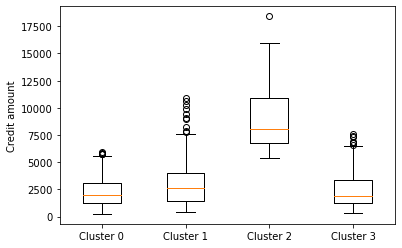

Number of people being liable to provide maintenance for


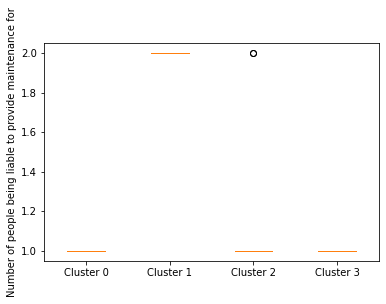

Age in years


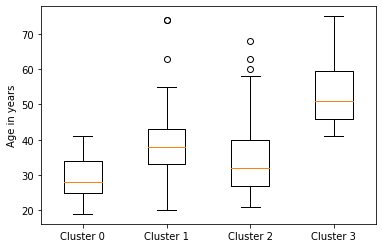

Cluster


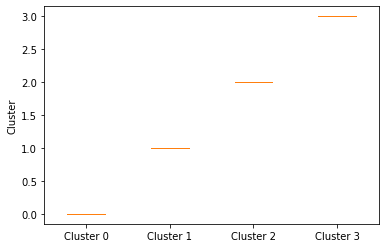

In [71]:
dfK['Cluster']=y_pred
i=0
for col in dfK: 
    print(col) 
    plt.cla()
    plt.boxplot([dfK.iloc[:,i][dfK.Cluster==0].tolist(),
                 dfK.iloc[:,i][dfK.Cluster==1].tolist(),
                dfK.iloc[:,i][dfK.Cluster==2].tolist(),
                 dfK.iloc[:,i][dfK.Cluster==3].tolist()],
                 labels=('Cluster 0','Cluster 1','Cluster 2','Cluster 3'))  
    plt.ylabel(col)
    plt.show()
    i=i+1

from the above box plot we can see that 
cluster 0 : low credit amount, 1 people being liable to provide maintenance, low age
cluster 1 : low credit amount but got more people with medium credit amount, 2 people being liable to provide maintenance, medium age
cluster 2 : medium credit amount with some high credit amount,1 people being liable to provide maintenance with some outliers(2people),  medium age but younger than cluster 1
cluster 3 : low credit amount,2 people being liable to provide maintenance, high age

### 1.3 Hierarchical Clustering

based on the findings in the above k means model, I have identified some useful variables: credit amount, age,maintenance , job  and Number of existing credits at this bank. they all achieve a relatively higher silhouette score than other variable in their combination. thus i will be playing with these variables mainly.

# 2 variables

In [72]:
# Select Two colulmns:  Age in years, Number of people being liable to provide maintenance for
dfHC = df_num.iloc[:,[4,6]]
dfHC.describe()

,Age in years,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000
mean,35.546000,1.155000
std,11.375469,0.362086
min,19.000000,1.000000
25%,27.000000,1.000000
50%,33.000000,1.000000
75%,42.000000,1.000000
max,75.000000,2.000000


In [73]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [74]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))


For n_clusters=2, the silhouette score is 0.6549447910068031
For n_clusters=3, the silhouette score is 0.6775391839417488
For n_clusters=4, the silhouette score is 0.6031951035921934
For n_clusters=5, the silhouette score is 0.596102058008247
For n_clusters=6, the silhouette score is 0.5629383215937349
For n_clusters=7, the silhouette score is 0.5684516298293493
For n_clusters=8, the silhouette score is 0.5466486090403675
For n_clusters=9, the silhouette score is 0.5409701639601004
For n_clusters=10, the silhouette score is 0.5400632175007734
For n_clusters=11, the silhouette score is 0.5367100427198168


In [75]:
# Plotting Silhouette Scores using a bar graph to compare the results 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6549447910068031
For n_clusters=3, the silhouette score is 0.6368828160526969
For n_clusters=4, the silhouette score is 0.668348512594644
For n_clusters=5, the silhouette score is 0.6157178473074466
For n_clusters=6, the silhouette score is 0.5947924646898496
For n_clusters=7, the silhouette score is 0.5772843909832203
For n_clusters=8, the silhouette score is 0.5737175303210816
For n_clusters=9, the silhouette score is 0.5688978979158879
For n_clusters=10, the silhouette score is 0.5634462963913577
For n_clusters=11, the silhouette score is 0.5541797055781037


ward method is better for this 2 variables and we can see that the highest silhouette score is 0.6775 for 3 clusters

In [76]:
# Select Two colulmns:  Age in years, Credit amount
dfHC = df_num.iloc[:,[4,1]]
dfHC.describe()

,Age in years,Credit amount
count,1000.000000,1000.000000
mean,35.546000,3271.258000
std,11.375469,2822.736876
min,19.000000,250.000000
25%,27.000000,1365.500000
50%,33.000000,2319.500000
75%,42.000000,3972.250000
max,75.000000,18424.000000


In [77]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 


In [78]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4747026880087615
For n_clusters=3, the silhouette score is 0.4801224391207474
For n_clusters=4, the silhouette score is 0.3326921058089698
For n_clusters=5, the silhouette score is 0.334884399490638
For n_clusters=6, the silhouette score is 0.3438995855572909
For n_clusters=7, the silhouette score is 0.3370084313366464
For n_clusters=8, the silhouette score is 0.34351859345111596
For n_clusters=9, the silhouette score is 0.3503923037973436
For n_clusters=10, the silhouette score is 0.3562321738197637
For n_clusters=11, the silhouette score is 0.35992535666046843


In [79]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5631501521683513
For n_clusters=3, the silhouette score is 0.5381507153650846
For n_clusters=4, the silhouette score is 0.44301615479171
For n_clusters=5, the silhouette score is 0.4160019030629328
For n_clusters=6, the silhouette score is 0.40232410001765984
For n_clusters=7, the silhouette score is 0.41432261912588353
For n_clusters=8, the silhouette score is 0.41267845145032195
For n_clusters=9, the silhouette score is 0.4117566667085667
For n_clusters=10, the silhouette score is 0.40993037417589473
For n_clusters=11, the silhouette score is 0.3760208649371099


we achieve a highest silhouette score with average linkage method with 0.5631 in 2 clusters.

In [80]:
# Select Two colulmns:  Age in years, job
dfHC = df_num.iloc[:,[4,8]]
dfHC.describe()

,Age in years,Job
count,1000.000000,1000.000000
mean,35.546000,0.562000
std,11.375469,0.821481
min,19.000000,0.000000
25%,27.000000,0.000000
50%,33.000000,0.000000
75%,42.000000,1.000000
max,75.000000,3.000000


In [81]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [82]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.41638352789556055
For n_clusters=3, the silhouette score is 0.5034613592493065
For n_clusters=4, the silhouette score is 0.5057273447747184
For n_clusters=5, the silhouette score is 0.5178271055351072
For n_clusters=6, the silhouette score is 0.4890179894760615
For n_clusters=7, the silhouette score is 0.5185356650389131
For n_clusters=8, the silhouette score is 0.5279162554888067
For n_clusters=9, the silhouette score is 0.5266194088145791
For n_clusters=10, the silhouette score is 0.5016796114354671
For n_clusters=11, the silhouette score is 0.5089799921768436


In [83]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4684943400832299
For n_clusters=3, the silhouette score is 0.47774165451057266
For n_clusters=4, the silhouette score is 0.4622250276258949
For n_clusters=5, the silhouette score is 0.46735339357770406
For n_clusters=6, the silhouette score is 0.5368976177911408
For n_clusters=7, the silhouette score is 0.5417524244411702
For n_clusters=8, the silhouette score is 0.532807982973855
For n_clusters=9, the silhouette score is 0.5471381475461097
For n_clusters=10, the silhouette score is 0.5441554583314989
For n_clusters=11, the silhouette score is 0.5414164311595897


we achieve a highest silhouette score with average linkage method with 0.544 in 10 clusters. followed by 0.5279 with ward method at 8 lucsters, they are too huge to handle so it might not be a good choice

In [157]:
# Select Two colulmns:  Age in years, Number of existing credits at this bank
dfHC = df_num.iloc[:,[4,5]]
dfHC.describe()

,Age in years,Number of existing credits at this bank
count,1000.000000,1000.000000
mean,35.546000,1.407000
std,11.375469,0.577654
min,19.000000,1.000000
25%,27.000000,1.000000
50%,33.000000,1.000000
75%,42.000000,2.000000
max,75.000000,4.000000


In [158]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [159]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5146919160784551
For n_clusters=3, the silhouette score is 0.5416909635540793
For n_clusters=4, the silhouette score is 0.5767530096975692
For n_clusters=5, the silhouette score is 0.5881274127749511
For n_clusters=6, the silhouette score is 0.5525348160693666
For n_clusters=7, the silhouette score is 0.532018976874751
For n_clusters=8, the silhouette score is 0.5202957350086699
For n_clusters=9, the silhouette score is 0.524240115998554
For n_clusters=10, the silhouette score is 0.5233733893962309
For n_clusters=11, the silhouette score is 0.5284401641555496


In [160]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6320876717695005
For n_clusters=3, the silhouette score is 0.4729514150726119
For n_clusters=4, the silhouette score is 0.43704268714535677
For n_clusters=5, the silhouette score is 0.485916086023002
For n_clusters=6, the silhouette score is 0.4818652448615041
For n_clusters=7, the silhouette score is 0.48943411119649216
For n_clusters=8, the silhouette score is 0.4894807446923777
For n_clusters=9, the silhouette score is 0.56805048127741
For n_clusters=10, the silhouette score is 0.5696054438749979
For n_clusters=11, the silhouette score is 0.5892483987636532


we achieve a highest silhouette score with average linkage method with 0.632 in 2 clusters.

In [88]:
# Select Two colulmns:  Age in years, Number of existing credits at this bank
dfHC = df_num.iloc[:,[1,6]]
dfHC.describe()

,Credit amount,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000
mean,3271.258000,1.155000
std,2822.736876,0.362086
min,250.000000,1.000000
25%,1365.500000,1.000000
50%,2319.500000,1.000000
75%,3972.250000,1.000000
max,18424.000000,2.000000


In [89]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [90]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6890905477681898
For n_clusters=3, the silhouette score is 0.6935289884037867
For n_clusters=4, the silhouette score is 0.6781223116147094
For n_clusters=5, the silhouette score is 0.6857640296329561
For n_clusters=6, the silhouette score is 0.5907195099989283
For n_clusters=7, the silhouette score is 0.5980826556402503
For n_clusters=8, the silhouette score is 0.5775030605521356
For n_clusters=9, the silhouette score is 0.5814140187812163
For n_clusters=10, the silhouette score is 0.5486200610390792
For n_clusters=11, the silhouette score is 0.5498376226802247


In [91]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6398522740392057
For n_clusters=3, the silhouette score is 0.6816201248594489
For n_clusters=4, the silhouette score is 0.6949560577279881
For n_clusters=5, the silhouette score is 0.7022758729191754
For n_clusters=6, the silhouette score is 0.6655560689149002
For n_clusters=7, the silhouette score is 0.6640067516767097
For n_clusters=8, the silhouette score is 0.6553648240293448
For n_clusters=9, the silhouette score is 0.6003146560613464
For n_clusters=10, the silhouette score is 0.5996757590641112
For n_clusters=11, the silhouette score is 0.5900451555069406


we achieve a highest silhouette score with average linkage method with 0.70227 in 5 clusters.

In [92]:
# Select Two colulmns:  Credit amount, Number of existing credits at this bank
dfHC = df_num.iloc[:,[1,5]]
dfHC.describe()

,Credit amount,Number of existing credits at this bank
count,1000.000000,1000.000000
mean,3271.258000,1.407000
std,2822.736876,0.577654
min,250.000000,1.000000
25%,1365.500000,1.000000
50%,2319.500000,1.000000
75%,3972.250000,2.000000
max,18424.000000,4.000000


In [93]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [94]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5480785630375012
For n_clusters=3, the silhouette score is 0.6253024353232038
For n_clusters=4, the silhouette score is 0.620737726713803
For n_clusters=5, the silhouette score is 0.657035765083109
For n_clusters=6, the silhouette score is 0.6554110751345886
For n_clusters=7, the silhouette score is 0.6105023022665552
For n_clusters=8, the silhouette score is 0.597704882674414
For n_clusters=9, the silhouette score is 0.6036242452663158
For n_clusters=10, the silhouette score is 0.6081281523060398
For n_clusters=11, the silhouette score is 0.6035084998208982


In [95]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5889414211742238
For n_clusters=3, the silhouette score is 0.5296232073120568
For n_clusters=4, the silhouette score is 0.5057732162073101
For n_clusters=5, the silhouette score is 0.495113033023481
For n_clusters=6, the silhouette score is 0.5898332282635002
For n_clusters=7, the silhouette score is 0.5860830212423991
For n_clusters=8, the silhouette score is 0.634018512304596
For n_clusters=9, the silhouette score is 0.6384335074893127
For n_clusters=10, the silhouette score is 0.6733963054569924
For n_clusters=11, the silhouette score is 0.6707647975199854


although we achieve 0.673 hilhouette score with average linkage mehtod at 10 cluster. the cluster is too much to handle, thus highest silhouette score is 0.657 at 5 clusters with ward linkage method

In [96]:
# Select Two colulmns:  Credit amount, job
dfHC = df_num.iloc[:,[1,8]]
dfHC.describe()

,Credit amount,Job
count,1000.000000,1000.000000
mean,3271.258000,0.562000
std,2822.736876,0.821481
min,250.000000,0.000000
25%,1365.500000,0.000000
50%,2319.500000,0.000000
75%,3972.250000,1.000000
max,18424.000000,3.000000


In [97]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [98]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.414211480810514
For n_clusters=3, the silhouette score is 0.5319293648072976
For n_clusters=4, the silhouette score is 0.5697827659429847
For n_clusters=5, the silhouette score is 0.6013775153132342
For n_clusters=6, the silhouette score is 0.5954293798229696
For n_clusters=7, the silhouette score is 0.6011276759813104
For n_clusters=8, the silhouette score is 0.5383864215365577
For n_clusters=9, the silhouette score is 0.5415879024729083
For n_clusters=10, the silhouette score is 0.556729433007883
For n_clusters=11, the silhouette score is 0.5619074409438568


In [99]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6175447280978679
For n_clusters=3, the silhouette score is 0.5983090820330852
For n_clusters=4, the silhouette score is 0.5430362438411463
For n_clusters=5, the silhouette score is 0.5422320804541184
For n_clusters=6, the silhouette score is 0.53816872616889
For n_clusters=7, the silhouette score is 0.5312808912198645
For n_clusters=8, the silhouette score is 0.5304756101238763
For n_clusters=9, the silhouette score is 0.4950499364486319
For n_clusters=10, the silhouette score is 0.4826447161233369
For n_clusters=11, the silhouette score is 0.6049644224047338


we achieve a highest silhouette score with average linkage method with 0.617 in 2 clusters.

For the 2 variable i chosen for the start will be credit amount and Number of people being liable to provide maintenance for as they have the highest silhouette score of 0.70

# 3 vriables

In [100]:
# Select three colulmns:  credit amount, Number of people being liable to provide maintenance for,age
dfHC = df_num.iloc[:,[1,6,4]]
dfHC.describe()

,Credit amount,Number of people being liable to provide maintenance for,Age in years
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.155000,35.546000
std,2822.736876,0.362086,11.375469
min,250.000000,1.000000,19.000000
25%,1365.500000,1.000000,27.000000
50%,2319.500000,1.000000,33.000000
75%,3972.250000,1.000000,42.000000
max,18424.000000,2.000000,75.000000


In [101]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [102]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5088018159878303
For n_clusters=3, the silhouette score is 0.4852747602128958
For n_clusters=4, the silhouette score is 0.49766605464739194
For n_clusters=5, the silhouette score is 0.4823928086867796
For n_clusters=6, the silhouette score is 0.36354256206581104
For n_clusters=7, the silhouette score is 0.36214789710195305
For n_clusters=8, the silhouette score is 0.36284923368808686
For n_clusters=9, the silhouette score is 0.35734498586277663
For n_clusters=10, the silhouette score is 0.33754036545358085
For n_clusters=11, the silhouette score is 0.3356817205187665


In [103]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44785340877005086
For n_clusters=3, the silhouette score is 0.5188481842705004
For n_clusters=4, the silhouette score is 0.5005422855038993
For n_clusters=5, the silhouette score is 0.4775365891574221
For n_clusters=6, the silhouette score is 0.4434647137434597
For n_clusters=7, the silhouette score is 0.4574023969561213
For n_clusters=8, the silhouette score is 0.4603248512206403
For n_clusters=9, the silhouette score is 0.4548762195172932
For n_clusters=10, the silhouette score is 0.47177065707323257
For n_clusters=11, the silhouette score is 0.4613113972117694


The highest silhouette score for the three variable is 0.5188 with average linkage method at 3 clusters

In [104]:
# Select three colulmns:  Age in years, Number of people being liable to provide maintenance for,job
dfHC = df_num.iloc[:,[1,6,8]]
dfHC.describe()

,Credit amount,Number of people being liable to provide maintenance for,Job
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.155000,0.562000
std,2822.736876,0.362086,0.821481
min,250.000000,1.000000,0.000000
25%,1365.500000,1.000000,0.000000
50%,2319.500000,1.000000,0.000000
75%,3972.250000,1.000000,1.000000
max,18424.000000,2.000000,3.000000


In [105]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [106]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.527700776085646
For n_clusters=3, the silhouette score is 0.48915203279038194
For n_clusters=4, the silhouette score is 0.5444648473106443
For n_clusters=5, the silhouette score is 0.5257107375077396
For n_clusters=6, the silhouette score is 0.5113424327561218
For n_clusters=7, the silhouette score is 0.5161870090055336
For n_clusters=8, the silhouette score is 0.5237530820248842
For n_clusters=9, the silhouette score is 0.5294306132606386
For n_clusters=10, the silhouette score is 0.5505387290954641
For n_clusters=11, the silhouette score is 0.5534073383583078


In [107]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4493923796119837
For n_clusters=3, the silhouette score is 0.5337150081768998
For n_clusters=4, the silhouette score is 0.5196022718735198
For n_clusters=5, the silhouette score is 0.4774901336881845
For n_clusters=6, the silhouette score is 0.5414002515185243
For n_clusters=7, the silhouette score is 0.5494483403632813
For n_clusters=8, the silhouette score is 0.5478211074850686
For n_clusters=9, the silhouette score is 0.5311415620666814
For n_clusters=10, the silhouette score is 0.5273738838654282
For n_clusters=11, the silhouette score is 0.526108845190174


we achieve a highest silhouette score with ward linkage method with 0.5534 in 11 clusters. followed by 0.5494 with average method at 7 clusters, they are too huge to handle so it might not be a good choice

In [108]:
# Select three colulmns:  Age in years, Number of people being liable to provide maintenance for,Number of existing credits at this bank
dfHC = df_num.iloc[:,[1,6,5]]
dfHC.describe()

,Credit amount,Number of people being liable to provide maintenance for,Number of existing credits at this bank
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.155000,1.407000
std,2822.736876,0.362086,0.577654
min,250.000000,1.000000,1.000000
25%,1365.500000,1.000000,1.000000
50%,2319.500000,1.000000,1.000000
75%,3972.250000,1.000000,2.000000
max,18424.000000,2.000000,4.000000


In [109]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [110]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))


For n_clusters=2, the silhouette score is 0.5294835800816964
For n_clusters=3, the silhouette score is 0.5073578758735312
For n_clusters=4, the silhouette score is 0.591146953690825
For n_clusters=5, the silhouette score is 0.6160710437377426
For n_clusters=6, the silhouette score is 0.6223361747643671
For n_clusters=7, the silhouette score is 0.6364280496960477
For n_clusters=8, the silhouette score is 0.6495496241252613
For n_clusters=9, the silhouette score is 0.6450744525390437
For n_clusters=10, the silhouette score is 0.6039305253302119
For n_clusters=11, the silhouette score is 0.60331154600576


In [111]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5640962866207774
For n_clusters=3, the silhouette score is 0.4837008912336767
For n_clusters=4, the silhouette score is 0.40757970334319776
For n_clusters=5, the silhouette score is 0.49955894358824127
For n_clusters=6, the silhouette score is 0.4880720398369589
For n_clusters=7, the silhouette score is 0.4852841157878534
For n_clusters=8, the silhouette score is 0.47519023254176457
For n_clusters=9, the silhouette score is 0.47627220828050604
For n_clusters=10, the silhouette score is 0.48393756075122624
For n_clusters=11, the silhouette score is 0.5915499653223004


The highest silhouette score for the three variable is 0.6495 with ward linkage method at 8 clusters, it might be too larger to consider. however, it have highest silhouette score for average method of 0.5915 at 11 cluster, which is even larger to handle, thus this combination i might not consider.

In [112]:
# Select three colulmns:  job, Number of people being liable to provide maintenance for,age
dfHC = df_num.iloc[:,[8,6,4]]
dfHC.describe()

,Job,Number of people being liable to provide maintenance for,Age in years
count,1000.000000,1000.000000,1000.000000
mean,0.562000,1.155000,35.546000
std,0.821481,0.362086,11.375469
min,0.000000,1.000000,19.000000
25%,0.000000,1.000000,27.000000
50%,0.000000,1.000000,33.000000
75%,1.000000,1.000000,42.000000
max,3.000000,2.000000,75.000000


In [113]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [114]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4976658440535565
For n_clusters=3, the silhouette score is 0.4650470818103564
For n_clusters=4, the silhouette score is 0.5131714332741324
For n_clusters=5, the silhouette score is 0.4654426922580582
For n_clusters=6, the silhouette score is 0.4682513410576858
For n_clusters=7, the silhouette score is 0.5072496977902147
For n_clusters=8, the silhouette score is 0.5033886533975792
For n_clusters=9, the silhouette score is 0.5115410118924069
For n_clusters=10, the silhouette score is 0.5145860120115167
For n_clusters=11, the silhouette score is 0.514929989578168


In [115]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.508710884370072
For n_clusters=3, the silhouette score is 0.4875340973627093
For n_clusters=4, the silhouette score is 0.5146766648834296
For n_clusters=5, the silhouette score is 0.5038290373153201
For n_clusters=6, the silhouette score is 0.48857085187960897
For n_clusters=7, the silhouette score is 0.46245375402256556
For n_clusters=8, the silhouette score is 0.4439091831944201
For n_clusters=9, the silhouette score is 0.4895438207888442
For n_clusters=10, the silhouette score is 0.47019016218705795
For n_clusters=11, the silhouette score is 0.4918477675685365


The highest silhouette score for the three variable is0.5149 with ward method with 11 clusters, it is too large to handle, thus the follwed up one is 0.5146 with average linkage method at 4 clusters.

In [116]:
# Select three colulmns:  Age in years, Number of people being liable to provide maintenance for,Number of existing credits at this bank
dfHC = df_num.iloc[:,[1,5,4]]
dfHC.describe()

,Credit amount,Number of existing credits at this bank,Age in years
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.407000,35.546000
std,2822.736876,0.577654,11.375469
min,250.000000,1.000000,19.000000
25%,1365.500000,1.000000,27.000000
50%,2319.500000,1.000000,33.000000
75%,3972.250000,2.000000,42.000000
max,18424.000000,4.000000,75.000000


In [117]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [118]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3324871610491251
For n_clusters=3, the silhouette score is 0.4001533160121393
For n_clusters=4, the silhouette score is 0.3992445130637977
For n_clusters=5, the silhouette score is 0.4101638201179301
For n_clusters=6, the silhouette score is 0.41692556276716924
For n_clusters=7, the silhouette score is 0.42518270799157576
For n_clusters=8, the silhouette score is 0.4309274635241019
For n_clusters=9, the silhouette score is 0.35380915532012397
For n_clusters=10, the silhouette score is 0.36511676062909093
For n_clusters=11, the silhouette score is 0.3640281578647666


In [119]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5453662240550836
For n_clusters=3, the silhouette score is 0.4201199382630673
For n_clusters=4, the silhouette score is 0.35122630722748016
For n_clusters=5, the silhouette score is 0.3420954770730145
For n_clusters=6, the silhouette score is 0.2991786073375329
For n_clusters=7, the silhouette score is 0.2832054781828697
For n_clusters=8, the silhouette score is 0.2605825691999318
For n_clusters=9, the silhouette score is 0.2414825087531987
For n_clusters=10, the silhouette score is 0.36746860939604514
For n_clusters=11, the silhouette score is 0.36670978406825905


The highest silhouette score is 0.5453 for average linkage method with 2 clusters, however it only have 2 clusters which might be to little to analyse

therefore, i wll be choosing the variable combination be  credit amount, Number of people being liable to provide maintenance for and age,  as it has the highest silhouette score of 0.5188 with acceptable number of cluster (3). It is also the same combination compared to kMeans.If it does not work i will be working on 

In [120]:
# Select three colulmns:  credit amount, Number of people being liable to provide maintenance for,age
dfHC = df_num.iloc[:,[1,6,4]]
dfHC.describe()

,Credit amount,Number of people being liable to provide maintenance for,Age in years
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.155000,35.546000
std,2822.736876,0.362086,11.375469
min,250.000000,1.000000,19.000000
25%,1365.500000,1.000000,27.000000
50%,2319.500000,1.000000,33.000000
75%,3972.250000,1.000000,42.000000
max,18424.000000,2.000000,75.000000


In [121]:
# Scaling the data so that all the features/attributes become comparable 
X =dfHC.values
scaler = StandardScaler() 
XHC_scaled = scaler.fit_transform(X) 

In [122]:
# Silhouette Scores 
k_range = range(2,12)

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_avg=silhouette_score(XHC_scaled, ac_i.fit_predict(XHC_scaled))

    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44785340877005086
For n_clusters=3, the silhouette score is 0.5188481842705004
For n_clusters=4, the silhouette score is 0.5005422855038993
For n_clusters=5, the silhouette score is 0.4775365891574221
For n_clusters=6, the silhouette score is 0.4434647137434597
For n_clusters=7, the silhouette score is 0.4574023969561213
For n_clusters=8, the silhouette score is 0.4603248512206403
For n_clusters=9, the silhouette score is 0.4548762195172932
For n_clusters=10, the silhouette score is 0.47177065707323257
For n_clusters=11, the silhouette score is 0.4613113972117694


In [123]:
# Build Agglomerative Clusting model with number of clusters set as 3
ac = AgglomerativeClustering(n_clusters = 3,linkage='average')
# Fit the model and assign each data point to the cluster
y_pred1 = ac.fit_predict(XHC_scaled) # fit and then predict

Credit amount


C:\Users\ljj\AppData\Local\Temp\ipykernel_10108\3623842103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHC['Cluster']=y_pred1


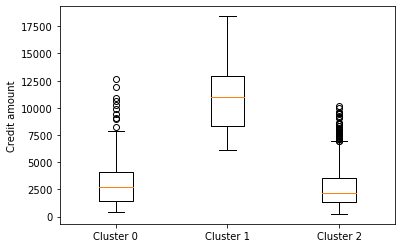

Number of people being liable to provide maintenance for


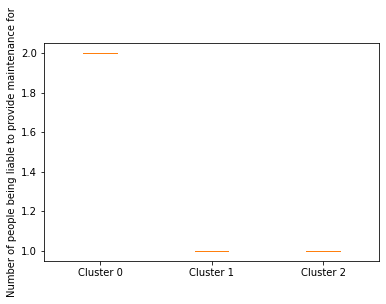

Age in years


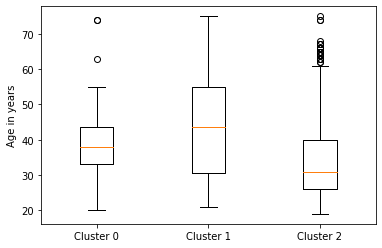

Cluster


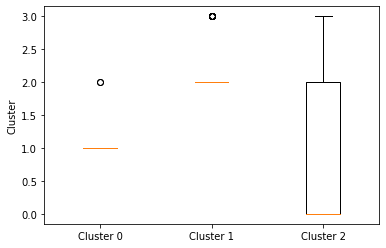

In [124]:
dfHC['Cluster']=y_pred1
i=0
for col in dfHC: 
    print(col) 
    plt.cla()
    plt.boxplot([dfK.iloc[:,i][dfHC.Cluster==0].tolist(),
                 dfK.iloc[:,i][dfHC.Cluster==1].tolist(),
                dfK.iloc[:,i][dfHC.Cluster==2].tolist()],
                 labels=('Cluster 0','Cluster 1','Cluster 2'))  
    plt.ylabel(col)
    plt.show()
    i=i+1

It is a acceptabl clustering as all of the clusters are not similar.
Cluster 0: low credit amount, 2 people being liable to provide maintenance for, medium age
Cluster 1: medium credit amount, 1 people being liable to provide maintenance for, high age
Cluter 2: low credit amount, 1 people being liable to provide maintenance for, low age

Comparing the 2 clustering, i think the clustering with K-Means model is better as it has 4 clusters compares to 3 clusters in hierarchical clustering model, thus it will be more precise. also, comparing the age, the kmeans clustering is better as they are not so similar compared to hierarchical clustering, also, thea datas are not so wide spread.

# insert cluster to original data set

In [125]:
# Select three colulmns:  Credit amount, Number of people being liable to provide maintenance for, age

dfK = df_num.iloc[:,[1,6,4]]
dfK.describe()

,Credit amount,Number of people being liable to provide maintenance for,Age in years
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,1.155000,35.546000
std,2822.736876,0.362086,11.375469
min,250.000000,1.000000,19.000000
25%,1365.500000,1.000000,27.000000
50%,2319.500000,1.000000,33.000000
75%,3972.250000,1.000000,42.000000
max,18424.000000,2.000000,75.000000


In [126]:
X =dfK.values
scaler = StandardScaler() 
XKmeans_scaled = scaler.fit_transform(X) 

In [127]:
kmeans = KMeans(n_clusters=4, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(XKmeans_scaled) # fit and then predict

Credit amount


C:\Users\ljj\AppData\Local\Temp\ipykernel_10108\1053256822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfK['Cluster']=y_pred


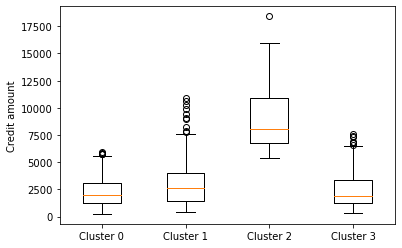

Number of people being liable to provide maintenance for


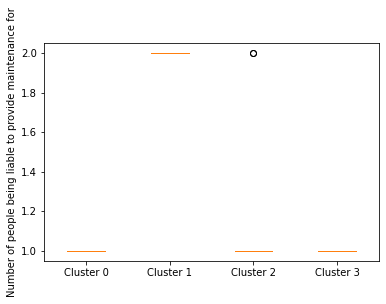

Age in years


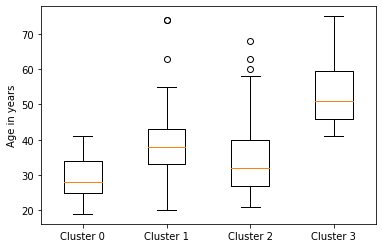

Cluster


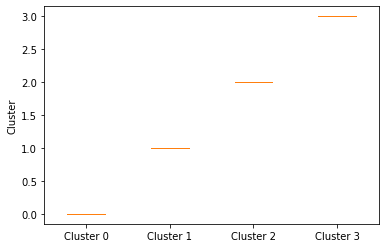

In [128]:
dfK['Cluster']=y_pred
i=0
for col in dfK: 
    print(col) 
    plt.cla()
    plt.boxplot([dfK.iloc[:,i][dfK.Cluster==0].tolist(),
                 dfK.iloc[:,i][dfK.Cluster==1].tolist(),
                dfK.iloc[:,i][dfK.Cluster==2].tolist(),
                 dfK.iloc[:,i][dfK.Cluster==3].tolist()],
                 labels=('Cluster 0','Cluster 1','Cluster 2','Cluster 3'))  
    plt.ylabel(col)
    plt.show()
    i=i+1

In [177]:
df['ClusterID'] = y_pred
df.head()

,Account Status,Duration in month,Credit History,Purpose,Credit amount,Savings account or bonds,Present employment since,Instalment rate in percentage of disposable income,Personal status and sex,Other debtors or guarantors,...,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Target,ClusteID,ClusterID
0,0,6,0,0,1169,Savings account,0,4,0,0,...,0,0,2,0,1,0,0,1,3,3
1,1,48,1,0,5951,Savings account,2,2,1,0,...,0,0,1,0,1,1,0,2,0,0
2,3,12,0,1,2096,Savings account,1,2,0,0,...,0,0,1,1,2,1,0,1,1,1
3,0,42,1,2,7882,Savings account,1,2,0,1,...,0,1,1,0,2,1,0,1,1,1
4,0,24,2,3,4870,Savings account,2,3,0,0,...,0,1,2,0,2,1,0,2,1,1


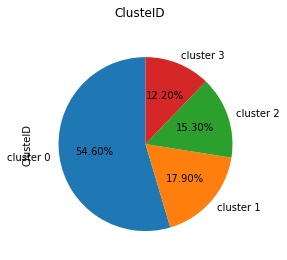

In [178]:
# see the target calss balance or not

df['ClusteID'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', 
                                         startangle = 90,labels = ['cluster 0','cluster 1','cluster 2','cluster 3'])

plt.suptitle('ClusteID', fontsize = 12)
plt.show()

<AxesSubplot:xlabel='Job'>

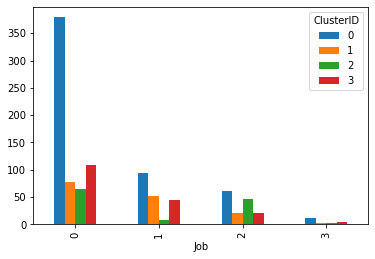

In [179]:
# bar graph for Job
df.groupby('ClusterID')['Job'].value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='Credit History'>

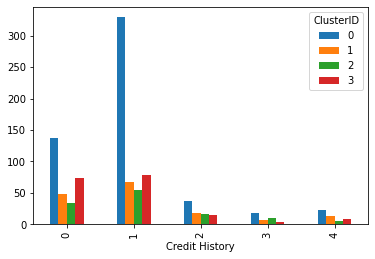

In [180]:
# bar graph for Credit History
df.groupby('ClusterID')['Credit History'].value_counts().unstack(0).plot.bar()

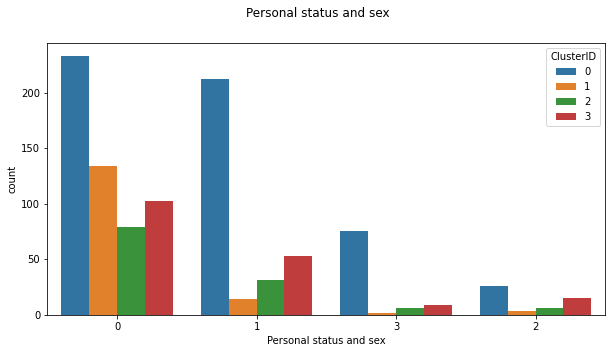

In [181]:
# bar graph for Personal status and sex
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Personal status and sex",data=df, hue='ClusterID',order = df["Personal status and sex"].value_counts().index)
plt.suptitle("Personal status and sex")
plt.show()